In [ ]:
from google.colab import files
import pandas as pd

# Cela va ouvrir une fenêtre pour sélectionner votre fichier sur votre ordinateur
uploaded = files.upload()

# Lire le fichier (remplacez 'votre_fichier.csv' par le nom réel)
df = pd.read_csv('studentPerformance.csv')

Saving studentPerformance.csv to studentPerformance (1).csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

X =df[['Study_Hours','Attendance','Practice_Tests']]
Y_linear = df['Final_Score']
Y_logistic = df['Pass_Fail']
X_train, X_test, Y_lin_train, Y_lin_test, Y_log_train, Y_log_test = train_test_split(
    X, Y_linear, Y_logistic, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# --- PARTIE A : RÉGRESSION LINÉAIRE (Pour la valeur continue) ---
model_lin = LinearRegression()
model_lin.fit(X_train_scaled, Y_lin_train)
pred_lin = model_lin.predict(X_test_scaled)
print(f"MSE Linéaire : {mean_squared_error(Y_lin_test, pred_lin):.2f}")

MSE Linéaire : 31.68


In [ ]:
# --- PARTIE B : RÉGRESSION LOGISTIQUE (Pour le 0 ou 1) ---
model_log = LogisticRegression()
model_log.fit(X_train_scaled, Y_log_train)
pred_log = model_log.predict(X_test_scaled)
print(f"Précision Logistique : {accuracy_score(Y_log_test, pred_log):.2%}")

Précision Logistique : 92.00%


In [ ]:
comparaison = pd.DataFrame({
    'Vraie Valeur Continue': Y_lin_test.values,
    'Prédiction Linéaire': pred_lin,
    'Vrai Label Binaire': Y_log_test.values,
    'Prédiction Logistique': pred_log
})
print(comparaison.head())

   Vraie Valeur Continue  Prédiction Linéaire  Vrai Label Binaire  \
0              67.796947            71.674251                   1   
1              63.519784            69.353931                   1   
2              59.501681            59.658355                   1   
3              57.710346            62.585222                   1   
4             100.000000           111.477257                   1   

   Prédiction Logistique  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  


In [ ]:
# Générer les prédictions
predictions_lin = model_lin.predict(X_test_scaled) # Pour la valeur continue
predictions_log = model_log.predict(X_test_scaled) # Pour le 0 ou 1

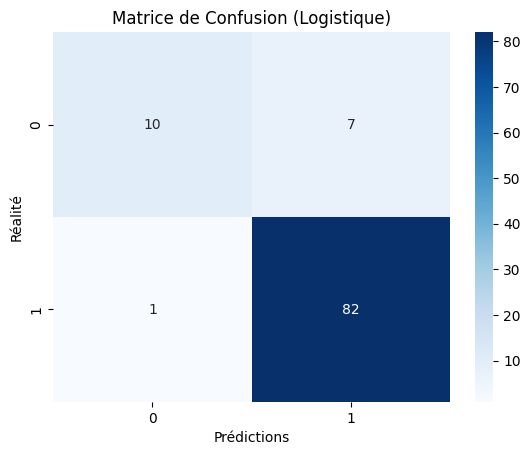

              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.92      0.99      0.95        83

    accuracy                           0.92       100
   macro avg       0.92      0.79      0.83       100
weighted avg       0.92      0.92      0.91       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la matrice de confusion
cm = confusion_matrix(Y_log_test, predictions_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion (Logistique)')
plt.show()

# Rapport complet : Précision, Rappel, F1-Score
print(classification_report(Y_log_test, predictions_log))

Erreur Moyenne (MAE) : 4.47
Score R2 : 0.9023


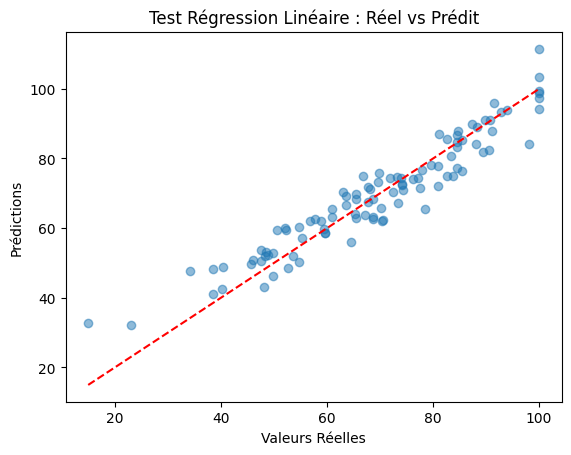

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"Erreur Moyenne (MAE) : {mean_absolute_error(Y_lin_test, predictions_lin):.2f}")
print(f"Score R2 : {r2_score(Y_lin_test, predictions_lin):.4f}")
# visualisation graphique
plt.scatter(Y_lin_test, predictions_lin, alpha=0.5)
plt.plot([Y_lin_test.min(), Y_lin_test.max()], [Y_lin_test.min(), Y_lin_test.max()], 'r--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Test Régression Linéaire : Réel vs Prédit')
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np
def predict_all(param1, param2, param3):
    # Organiser les entrées dans un tableau numpy
    input_data = np.array([[param1, param2, param3]])

    # 2. Appliquer le scaling (TRES IMPORTANT)
    # On utilise le 'scaler' que vous avez défini lors de l'entraînement
    input_scaled = scaler.transform(input_data)

    # 3. Faire les prédictions
    res_lin = model_lin.predict(input_scaled)[0]
    res_log = model_log.predict(input_scaled)[0]

    # Transformer le résultat logistique en texte lisible
    label_log = "you passed! congrats!!" if res_log == 1 else "you need just more work, you faild ):"

    return f"{res_lin:.2f}", label_log
interface = gr.Interface(
    fn=predict_all,
    inputs=[
        gr.Number(label="Study_Hours"),
        gr.Number(label="Attendance"),
        gr.Number( label="Practice_Tests")
    ],
    outputs=[
        gr.Textbox(label="Final_Score"),
        gr.Textbox(label="Pass_Fail")
    ],
    title="Academique Results",
    description="Enter your informations to know how you are going to spend the holiday"
)
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://092e90ff0d65efdc55.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
